# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']

In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_for_type = pyber_data_df.groupby(['type']).mean()['fare']

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_for_type = total_fares_by_type / total_drivers_by_type

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
        {'Total Rides' : total_rides_by_type,
         'Total Drivers' : total_drivers_by_type,
         'Total Fares' : total_fares_by_type,
         'Average Fare per Ride' : average_fare_per_ride_for_type,
         'Average Fare per Driver' : average_fare_per_driver_for_type})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.0f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,328",$34.62,$55.49
Suburban,625,490,"$19,356",$30.97,$39.50
Urban,"1,625","2,405","$39,854",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
# Done above?

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date_df = pyber_data_df.groupby(['date','type']).sum()['fare']

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_df = fares_by_date_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivot = fares_by_date_df.pivot(index='date', columns='type', values='fare')

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_fares_by_date_pivot = fares_by_date_pivot.loc['2019-01-01 00':'2019-04-29']

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_fares_by_date_pivot.index = pd.to_datetime(new_fares_by_date_pivot.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
new_fares_by_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
final_fares_by_date_pivot = new_fares_by_date_pivot.resample('W').sum()

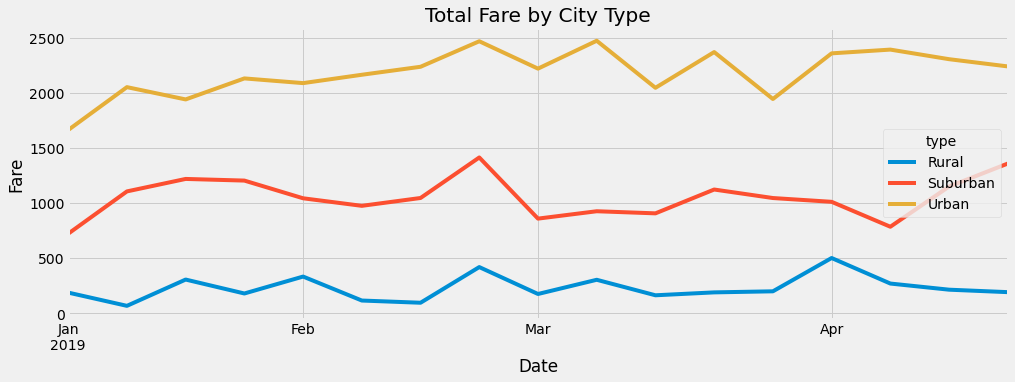

In [19]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fig = final_fares_by_date_pivot.plot(y=['Rural','Suburban','Urban'], 
                               xlabel='Date', ylabel='Fare',
                               title='Total Fare by City Type',
                               figsize=(15,5)).get_figure()

fig.savefig('C:/Users/david/OneDrive/DataScience_BootCamp_22/Module5_Matplotlib/PyBer-Analysis/Analysis/analysis.png')